# Vector Search vs Keyword Search

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading sentence transformer model...
Creating document embeddings...

----- Vector Search Example -----

Query: 'Dog attack on human'
1. The animal attacked the person unexpectedly (similarity: 0.6756)
2. The dog bit the man (similarity: 0.6647)
3. The man bit the dog (similarity: 0.6445)

Query: 'Animal being friendly'
1. My pet is very friendly to people (similarity: 0.7359)
2. The animal attacked the person unexpectedly (similarity: 0.5945)
3. The dog bit the man (similarity: 0.4712)


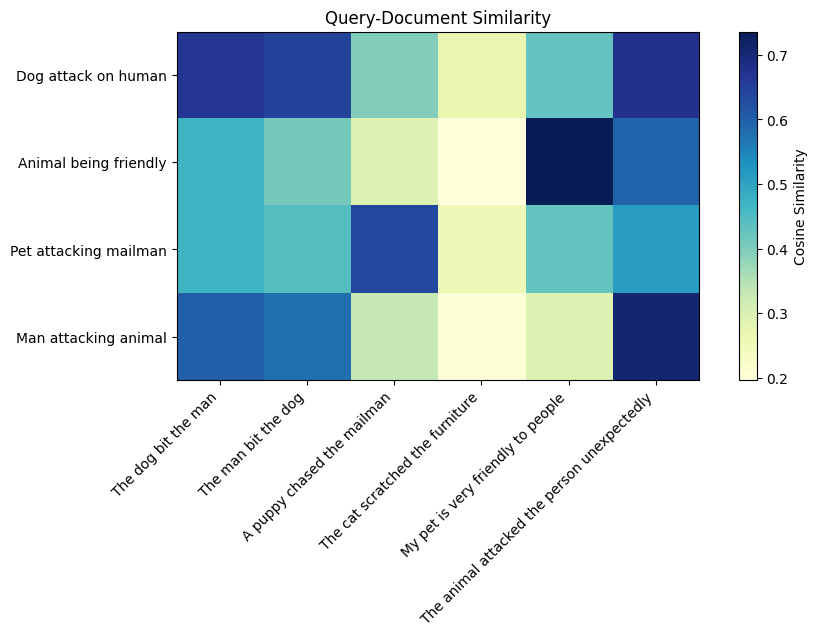


----- Keyword vs Vector Search Comparison -----

Query: 'Animal attacking person'

Keyword Search Results:
1. The animal attacked the person unexpectedly (keyword matches: 2)

Vector Search Results:
1. The animal attacked the person unexpectedly (similarity: 0.8691)
2. The dog bit the man (similarity: 0.5459)
3. The man bit the dog (similarity: 0.5049)


In [4]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

# 1. Create a small corpus of text documents
documents = [
    "The dog bit the man",
    "The man bit the dog",
    "A puppy chased the mailman",
    "The cat scratched the furniture",
    "My pet is very friendly to people",
    "The animal attacked the person unexpectedly"
]

# 2. Load a pre-trained sentence transformer model
# This converts sentences to vector embeddings
print("Loading sentence transformer model...")
model = SentenceTransformer('all-MiniLM-L6-v2')

# 3. Create vector embeddings for all documents
print("Creating document embeddings...")
document_embeddings = model.encode(documents)

# 4. Function to perform vector search
def vector_search(query, top_k=3):
    # Convert query to vector embedding
    query_embedding = model.encode([query])[0]
    
    # Calculate similarity between query and all documents
    similarities = cosine_similarity([query_embedding], document_embeddings)[0]
    
    # Get indices of top k most similar documents
    top_indices = np.argsort(similarities)[::-1][:top_k]
    
    # Return results with similarity scores
    results = []
    for idx in top_indices:
        results.append({
            'document': documents[idx],
            'similarity': similarities[idx]
        })
    
    return results

# 5. Try different queries and show the results
print("\n----- Vector Search Example -----")

# Example 1: Search for dog attacking human
query1 = "Dog attack on human"
results1 = vector_search(query1)
print(f"\nQuery: '{query1}'")
for i, result in enumerate(results1):
    print(f"{i+1}. {result['document']} (similarity: {result['similarity']:.4f})")

# Example 2: Search for pet being nice
query2 = "Animal being friendly"
results2 = vector_search(query2)
print(f"\nQuery: '{query2}'")
for i, result in enumerate(results2):
    print(f"{i+1}. {result['document']} (similarity: {result['similarity']:.4f})")

# 6. Visualize with a simple heatmap
def plot_similarity_heatmap(queries):
    # Create embeddings for both documents and queries
    query_embeddings = model.encode(queries)
    
    # Calculate similarities between all queries and documents
    similarity_matrix = cosine_similarity(query_embeddings, document_embeddings)
    
    # Plot heatmap
    plt.figure(figsize=(10, 6))
    heatmap = plt.imshow(similarity_matrix, cmap='YlGnBu')
    plt.colorbar(heatmap, label='Cosine Similarity')
    
    plt.yticks(range(len(queries)), queries)
    plt.xticks(range(len(documents)), documents, rotation=45, ha='right')
    plt.tight_layout()
    plt.title('Query-Document Similarity')
    plt.show()

# Visualize similarities for different queries
plot_similarity_heatmap([
    "Dog attack on human",
    "Animal being friendly", 
    "Pet attacking mailman",
    "Man attacking animal"
])

# 7. Compare with basic keyword matching
def keyword_search(query, documents, top_k=3):
    # Split query into keywords
    keywords = query.lower().split()
    
    # Count keyword matches in each document
    scores = []
    for doc in documents:
        doc_words = doc.lower().split()
        matches = sum(1 for keyword in keywords if keyword in doc_words)
        scores.append(matches)
    
    # Get top k documents
    top_indices = np.argsort(scores)[::-1][:top_k]
    
    # Return results
    results = []
    for idx in top_indices:
        if scores[idx] > 0:  # Only include documents with at least one match
            results.append({
                'document': documents[idx],
                'matches': scores[idx]
            })
    
    return results

# Compare keyword search vs vector search
print("\n----- Keyword vs Vector Search Comparison -----")
comparison_query = "Animal attacking person"

print(f"\nQuery: '{comparison_query}'")
print("\nKeyword Search Results:")
keyword_results = keyword_search(comparison_query, documents)
for i, result in enumerate(keyword_results):
    print(f"{i+1}. {result['document']} (keyword matches: {result['matches']})")

print("\nVector Search Results:")
vector_results = vector_search(comparison_query)
for i, result in enumerate(vector_results):
    print(f"{i+1}. {result['document']} (similarity: {result['similarity']:.4f})")